In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

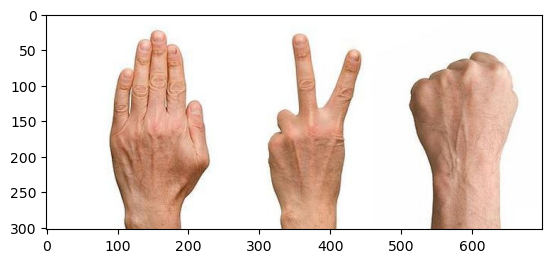

In [2]:
IMAGE_FILE = "archives/piedra_papel_tijera.jpg"

img = cv.imread(IMAGE_FILE)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)

  return annotated_image

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


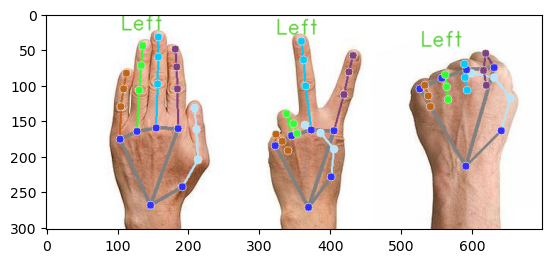

In [4]:
BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

mp_image = mp.Image.create_from_file(IMAGE_FILE)

# Create a hand landmarker instance with the image mode:
options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path='archives/hand_landmarker.task'),
    running_mode=VisionRunningMode.IMAGE,
    num_hands=3)
with HandLandmarker.create_from_options(options) as landmarker:
  # The landmarker is initialized. Use it here.
  # ...
    hand_landmarker_result = landmarker.detect(mp_image)

annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), hand_landmarker_result)
plt.imshow(annotated_image)


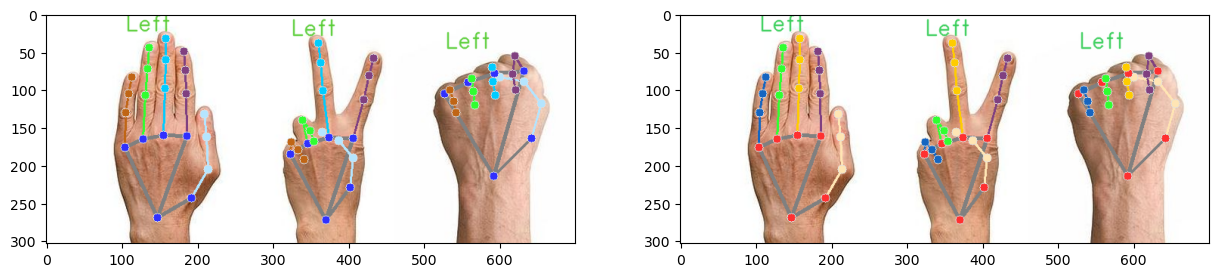

In [5]:
# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='archives/hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=3)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)
image_from_opencv = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
annotated_image_opencv = draw_landmarks_on_image(image_from_opencv.numpy_view(), detection_result)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax1.imshow(annotated_image)
ax2.imshow(cv.cvtColor(annotated_image_opencv, cv.COLOR_BGR2RGB))